In [16]:
import re
import pandas as pd

In [17]:
player_infos = pd.read_pickle('./raw_data/player_infos.pkl')
df_total_earning_each_year = pd.read_pickle('./raw_data/total_earning_each_year.pkl')
df = pd.read_pickle("./raw_data/top1000_highest_earning.pkl")

In [18]:
#top 1000 info, there are 100 duplicate on the first 100
player_infos = player_infos[100:]
player_infos
#drop na on worldranking
player_infos = player_infos.dropna(subset=['World Ranking'])
# replace #1 to 1 on world ranking in order to merge
player_infos['World Ranking'] = player_infos['World Ranking'].apply(lambda x: int(str(x).replace("#","")))
# replace .1 to 1 on world ranking in order to merge
df['Rank'] = df['Rank'].apply(lambda x: int(str(x).replace(".","")))
# rename column
player_infos = player_infos.rename(columns={"World Ranking":"Rank"})
player_infos

,Title,Name,Date of Birth,Age,Rank,Country Ranking,Total Prize Money Earned,Alternate IDs
100,"Johan ""N0tail"" Sundstein - Dota 2 Player",Johan Sundstein,"October 8, 1993",30,1,#1,"$7,184,163.05From 130 Tournaments","BDN, BigDaddyN0tail, N0tail, [MSI] N0tail"
101,"Jesse ""JerAx"" Vainikka - Dota 2 Player",Jesse Vainikka,"May 7, 1992",31,2,#1,"$6,486,623.98From 68 Tournaments",JerAx
102,"Anathan ""ana"" Pham - Dota 2 Player",Anathan Pham,"October 26, 1999",24,3,#1,"$6,024,411.96From 26 Tournaments","ana, OG.ana"
103,"Sébastien ""Ceb"" Debs - Dota 2 Player",Sébastien Debs,"May 11, 1992",31,4,#1,"$5,887,342.73From 74 Tournaments","7ckngMad, Ce6, Ceb, FuckingMad, mTw 7ckngMad, ..."
104,"Topias ""Topson"" Taavitsainen - Dota 2 Player",Topias Taavitsainen,"April 14, 1998",25,5,#2,"$5,722,674.53From 37 Tournaments","OG.Topson, Topson"
...,...,...,...,...,...,...,...,...
1095,"He ""魏无羡"" Tianyou - PLAYERUNKNOWN'S BATTLEGROUN...","He, Tianyou(何天佑)","February 4, 2003",20,996,#196,"$279,634.26From 11 Tournaments","Wwx, 魏无羡"
1096,"Søren ""Bjergsen"" Bjerg - League of Legends Player",Søren Bjerg,"February 21, 1996",27,997,#44,"$278,972.70From 39 Tournaments","Bjerg, Bjergsen, Blue Buff Taker, dessert dog,..."
1097,"Dmitriy ""LighTofHeaveN"" Kupriyanov - Dota 2 Pl...",Dmitriy Kupriyanov(Дмитрий Куприянов),"January 4, 1988",35,998,#55,"$278,469.74From 34 Tournaments","DTS)Light, DTS|Light, Light, LighTofHeaveN, Lo..."
1098,"Jessadaphan ""MarkKy"" Siripattanaton - Arena of...",Jessadaphan Siripattanaton(เจษฎาพันธ์ ศิริพัฒน...,"July 8, 2005",18,999,#12,"$277,955.30From 17 Tournaments",MarkKy


In [19]:
players_1000th = df.merge(player_infos , how = 'inner',on = 'Rank')

In [20]:
players_1000th["Player"] = players_1000th["Player Tag"] + " " + players_1000th["Player Name"]

In [21]:
years = [2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001]

In [22]:
for year in years:
    # Rename the year column
    df_total_earning_each_year[year].rename(columns={"Total_Year": f"Total_{year}"}, inplace=True)

In [23]:
for year in years:    
    # Merge the data with the year-specific column
    players_1000th = players_1000th.merge(df_total_earning_each_year[year][['Player', f"Total_{year}"]], how='left', on="Player")

In [24]:
players_1000th.drop_duplicates(subset=['Player Tag'])

,Rank,Player Tag,Player Name,Total Earnings,Country,Primary Game,Game Earnings,Earnings Percentage,Player Profile Link,Title,...,Total_2010,Total_2009,Total_2008,Total_2007,Total_2006,Total_2005,Total_2004,Total_2003,Total_2002,Total_2001
0,1,N0tail,Johan Sundstein,"$7,184,163.05",Denmark,Dota 2,"$7,172,436.83",99.84%,https://www.esportsearnings.com/players/3304-n...,"Johan ""N0tail"" Sundstein - Dota 2 Player",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,JerAx,Jesse Vainikka,"$6,486,623.98",Finland,Dota 2,"$6,486,075.22",99.99%,https://www.esportsearnings.com/players/3822-j...,"Jesse ""JerAx"" Vainikka - Dota 2 Player",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,ana,Anathan Pham,"$6,024,411.96",Australia,Dota 2,"$6,024,411.96",100.00%,https://www.esportsearnings.com/players/30451-...,"Anathan ""ana"" Pham - Dota 2 Player",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,Ceb,Sébastien Debs,"$5,887,342.73",France,Dota 2,"$5,887,342.73",100.00%,https://www.esportsearnings.com/players/2811-c...,"Sébastien ""Ceb"" Debs - Dota 2 Player",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5,Topson,Topias Taavitsainen,"$5,722,674.53",Finland,Dota 2,"$5,722,674.53",100.00%,https://www.esportsearnings.com/players/18897-...,"Topias ""Topson"" Taavitsainen - Dota 2 Player",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,996,MarkKy,Jessadaphan Siripattanaton,"$281,955.30",Thailand,Arena of Valor,"$281,955.30",100.00%,https://www.esportsearnings.com/players/81914-...,"He ""魏无羡"" Tianyou - PLAYERUNKNOWN'S BATTLEGROUN...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095,997,sitetampo,"-, -","$281,833.35",Japan,Brawl Stars,"$281,833.35",100.00%,https://www.esportsearnings.com/players/100425...,"Søren ""Bjergsen"" Bjerg - League of Legends Player",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096,998,VINI,Vinicius Figueiredo,"$281,791.42",Brazil,Counter-Strike: Global Offensive,"$275,338.69",97.71%,https://www.esportsearnings.com/players/17434-...,"Dmitriy ""LighTofHeaveN"" Kupriyanov - Dota 2 Pl...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1097,999,birdring,"Kim, Ji Hyuk","$281,789.55","Korea, Republic of",Overwatch,"$240,203.84",85.24%,https://www.esportsearnings.com/players/34123-...,"Jessadaphan ""MarkKy"" Siripattanaton - Arena of...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
players_1000th

,Rank,Player Tag,Player Name,Total Earnings,Country,Primary Game,Game Earnings,Earnings Percentage,Player Profile Link,Title,...,Total_2010,Total_2009,Total_2008,Total_2007,Total_2006,Total_2005,Total_2004,Total_2003,Total_2002,Total_2001
0,1,N0tail,Johan Sundstein,"$7,184,163.05",Denmark,Dota 2,"$7,172,436.83",99.84%,https://www.esportsearnings.com/players/3304-n...,"Johan ""N0tail"" Sundstein - Dota 2 Player",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,N0tail,Johan Sundstein,"$7,184,163.05",Denmark,Dota 2,"$7,172,436.83",99.84%,https://www.esportsearnings.com/players/3304-n...,"Johan ""N0tail"" Sundstein - Dota 2 Player",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,JerAx,Jesse Vainikka,"$6,486,623.98",Finland,Dota 2,"$6,486,075.22",99.99%,https://www.esportsearnings.com/players/3822-j...,"Jesse ""JerAx"" Vainikka - Dota 2 Player",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,JerAx,Jesse Vainikka,"$6,486,623.98",Finland,Dota 2,"$6,486,075.22",99.99%,https://www.esportsearnings.com/players/3822-j...,"Jesse ""JerAx"" Vainikka - Dota 2 Player",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,ana,Anathan Pham,"$6,024,411.96",Australia,Dota 2,"$6,024,411.96",100.00%,https://www.esportsearnings.com/players/30451-...,"Anathan ""ana"" Pham - Dota 2 Player",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,996,MarkKy,Jessadaphan Siripattanaton,"$281,955.30",Thailand,Arena of Valor,"$281,955.30",100.00%,https://www.esportsearnings.com/players/81914-...,"He ""魏无羡"" Tianyou - PLAYERUNKNOWN'S BATTLEGROUN...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095,997,sitetampo,"-, -","$281,833.35",Japan,Brawl Stars,"$281,833.35",100.00%,https://www.esportsearnings.com/players/100425...,"Søren ""Bjergsen"" Bjerg - League of Legends Player",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096,998,VINI,Vinicius Figueiredo,"$281,791.42",Brazil,Counter-Strike: Global Offensive,"$275,338.69",97.71%,https://www.esportsearnings.com/players/17434-...,"Dmitriy ""LighTofHeaveN"" Kupriyanov - Dota 2 Pl...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1097,999,birdring,"Kim, Ji Hyuk","$281,789.55","Korea, Republic of",Overwatch,"$240,203.84",85.24%,https://www.esportsearnings.com/players/34123-...,"Jessadaphan ""MarkKy"" Siripattanaton - Arena of...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
players_1000th = players_1000th.fillna(0)

In [27]:
players_1000th

,Rank,Player Tag,Player Name,Total Earnings,Country,Primary Game,Game Earnings,Earnings Percentage,Player Profile Link,Title,...,Total_2010,Total_2009,Total_2008,Total_2007,Total_2006,Total_2005,Total_2004,Total_2003,Total_2002,Total_2001
0,1,N0tail,Johan Sundstein,"$7,184,163.05",Denmark,Dota 2,"$7,172,436.83",99.84%,https://www.esportsearnings.com/players/3304-n...,"Johan ""N0tail"" Sundstein - Dota 2 Player",...,0,0,0,0,0,0,0,0,0,0
1,1,N0tail,Johan Sundstein,"$7,184,163.05",Denmark,Dota 2,"$7,172,436.83",99.84%,https://www.esportsearnings.com/players/3304-n...,"Johan ""N0tail"" Sundstein - Dota 2 Player",...,0,0,0,0,0,0,0,0,0,0
2,2,JerAx,Jesse Vainikka,"$6,486,623.98",Finland,Dota 2,"$6,486,075.22",99.99%,https://www.esportsearnings.com/players/3822-j...,"Jesse ""JerAx"" Vainikka - Dota 2 Player",...,0,0,0,0,0,0,0,0,0,0
3,2,JerAx,Jesse Vainikka,"$6,486,623.98",Finland,Dota 2,"$6,486,075.22",99.99%,https://www.esportsearnings.com/players/3822-j...,"Jesse ""JerAx"" Vainikka - Dota 2 Player",...,0,0,0,0,0,0,0,0,0,0
4,3,ana,Anathan Pham,"$6,024,411.96",Australia,Dota 2,"$6,024,411.96",100.00%,https://www.esportsearnings.com/players/30451-...,"Anathan ""ana"" Pham - Dota 2 Player",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,996,MarkKy,Jessadaphan Siripattanaton,"$281,955.30",Thailand,Arena of Valor,"$281,955.30",100.00%,https://www.esportsearnings.com/players/81914-...,"He ""魏无羡"" Tianyou - PLAYERUNKNOWN'S BATTLEGROUN...",...,0,0,0,0,0,0,0,0,0,0
1095,997,sitetampo,"-, -","$281,833.35",Japan,Brawl Stars,"$281,833.35",100.00%,https://www.esportsearnings.com/players/100425...,"Søren ""Bjergsen"" Bjerg - League of Legends Player",...,0,0,0,0,0,0,0,0,0,0
1096,998,VINI,Vinicius Figueiredo,"$281,791.42",Brazil,Counter-Strike: Global Offensive,"$275,338.69",97.71%,https://www.esportsearnings.com/players/17434-...,"Dmitriy ""LighTofHeaveN"" Kupriyanov - Dota 2 Pl...",...,0,0,0,0,0,0,0,0,0,0
1097,999,birdring,"Kim, Ji Hyuk","$281,789.55","Korea, Republic of",Overwatch,"$240,203.84",85.24%,https://www.esportsearnings.com/players/34123-...,"Jessadaphan ""MarkKy"" Siripattanaton - Arena of...",...,0,0,0,0,0,0,0,0,0,0


In [28]:
players_1000th.to_excel("./raw_data/players_1000th.xlsx", index=False)

In [29]:
players_1000th

,Rank,Player Tag,Player Name,Total Earnings,Country,Primary Game,Game Earnings,Earnings Percentage,Player Profile Link,Title,...,Total_2010,Total_2009,Total_2008,Total_2007,Total_2006,Total_2005,Total_2004,Total_2003,Total_2002,Total_2001
0,1,N0tail,Johan Sundstein,"$7,184,163.05",Denmark,Dota 2,"$7,172,436.83",99.84%,https://www.esportsearnings.com/players/3304-n...,"Johan ""N0tail"" Sundstein - Dota 2 Player",...,0,0,0,0,0,0,0,0,0,0
1,1,N0tail,Johan Sundstein,"$7,184,163.05",Denmark,Dota 2,"$7,172,436.83",99.84%,https://www.esportsearnings.com/players/3304-n...,"Johan ""N0tail"" Sundstein - Dota 2 Player",...,0,0,0,0,0,0,0,0,0,0
2,2,JerAx,Jesse Vainikka,"$6,486,623.98",Finland,Dota 2,"$6,486,075.22",99.99%,https://www.esportsearnings.com/players/3822-j...,"Jesse ""JerAx"" Vainikka - Dota 2 Player",...,0,0,0,0,0,0,0,0,0,0
3,2,JerAx,Jesse Vainikka,"$6,486,623.98",Finland,Dota 2,"$6,486,075.22",99.99%,https://www.esportsearnings.com/players/3822-j...,"Jesse ""JerAx"" Vainikka - Dota 2 Player",...,0,0,0,0,0,0,0,0,0,0
4,3,ana,Anathan Pham,"$6,024,411.96",Australia,Dota 2,"$6,024,411.96",100.00%,https://www.esportsearnings.com/players/30451-...,"Anathan ""ana"" Pham - Dota 2 Player",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,996,MarkKy,Jessadaphan Siripattanaton,"$281,955.30",Thailand,Arena of Valor,"$281,955.30",100.00%,https://www.esportsearnings.com/players/81914-...,"He ""魏无羡"" Tianyou - PLAYERUNKNOWN'S BATTLEGROUN...",...,0,0,0,0,0,0,0,0,0,0
1095,997,sitetampo,"-, -","$281,833.35",Japan,Brawl Stars,"$281,833.35",100.00%,https://www.esportsearnings.com/players/100425...,"Søren ""Bjergsen"" Bjerg - League of Legends Player",...,0,0,0,0,0,0,0,0,0,0
1096,998,VINI,Vinicius Figueiredo,"$281,791.42",Brazil,Counter-Strike: Global Offensive,"$275,338.69",97.71%,https://www.esportsearnings.com/players/17434-...,"Dmitriy ""LighTofHeaveN"" Kupriyanov - Dota 2 Pl...",...,0,0,0,0,0,0,0,0,0,0
1097,999,birdring,"Kim, Ji Hyuk","$281,789.55","Korea, Republic of",Overwatch,"$240,203.84",85.24%,https://www.esportsearnings.com/players/34123-...,"Jessadaphan ""MarkKy"" Siripattanaton - Arena of...",...,0,0,0,0,0,0,0,0,0,0


In [30]:
from datetime import datetime

# Extracting the relevant columns from the dataframe and creating a copy
player_age_revenue = players_1000th[['Player Name', 'Date of Birth', 'Age'] + [f'Total_{year}' for year in range(2001, 2023)]].copy()

# Convert 'Date of Birth' to datetime and calculate the year of turning 18
player_age_revenue['Date of Birth'] = pd.to_datetime(player_age_revenue['Date of Birth'], errors='coerce')
player_age_revenue['Year Turned 18'] = player_age_revenue['Date of Birth'].apply(lambda x: x.year + 18 if pd.notnull(x) else None)

# Initialize columns for total earnings before and after turning 18
player_age_revenue['Total Before 18'] = 0.0
player_age_revenue['Total After 18'] = 0.0
player_age_revenue['Years Before 18'] = 0
player_age_revenue['Years After 18'] = 0

# Iterate over each row and sum the earnings
for index, row in player_age_revenue.iterrows():
    year_turned_18 = row['Year Turned 18']
    for year in range(2001, 2023):
        earning = row[f'Total_{year}']
        if pd.notnull(earning) and earning != 0:
            # Convert string earnings to float after removing currency symbols and commas
            try:
                earning = float(earning.replace('$', '').replace(',', ''))
            except ValueError:
                continue

            if year_turned_18 and year < year_turned_18:
                player_age_revenue.at[index, 'Total Before 18'] += earning
                player_age_revenue.at[index, 'Years Before 18'] += 1                
            elif year_turned_18 and year >= year_turned_18:
                player_age_revenue.at[index, 'Total After 18'] += earning
                player_age_revenue.at[index, 'Years After 18'] += 1                
                

player_age_revenue = player_age_revenue.drop_duplicates()

# Sort the DataFrame in ascending order by 'Total Before 18'
player_age_revenue = player_age_revenue.sort_values('Total Before 18')

# Display the DataFrame
player_age_revenue[['Player Name', 'Total Before 18', 'Total After 18', 'Years Before 18', 'Years After 18']]

,Player Name,Total Before 18,Total After 18,Years Before 18,Years After 18
0,Johan Sundstein,0.00,7182448.04,0,11
722,"Liu, Tao",0.00,176944.16,0,1
723,"Wei, Zhen",0.00,0.00,0,0
725,Francois Delaunay,0.00,0.00,0,0
726,"Liu, Qingsong",0.00,226455.00,0,1
...,...,...,...,...,...
192,"Zhang, Pan",1389606.85,0.00,5,0
158,Emil Bergquist Pedersen,1520286.19,0.00,1,0
76,David Wang,1826620.21,287158.00,1,2
34,Sumail Hassan,2388944.14,1416127.87,2,4


{'China': 210678129.90000013, 'United States': 103539144.39000003, 'Russian Federation': 72198864.63, 'Denmark': 64846895.73999998, 'Korea, Republic of': 57493342.120000005, 'Ukraine': 41160712.94, 'Finland': 37870780.06, 'Sweden': 37786715.2, 'France': 30673540.97999999, 'Canada': 25767103.749999996}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'China'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'Russian Federation'),
  Text(3, 0, 'Denmark'),
  Text(4, 0, 'Korea, Republic of'),
  Text(5, 0, 'Ukraine'),
  Text(6, 0, 'Finland'),
  Text(7, 0, 'Sweden'),
  Text(8, 0, 'France'),
  Text(9, 0, 'Canada')])

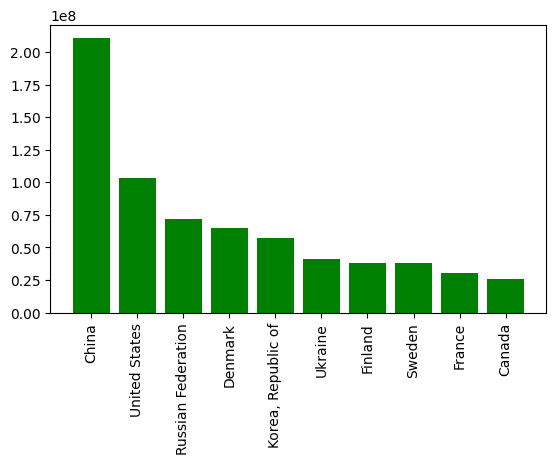

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

country_earnings = {}
for index, player in players_1000th.iterrows():
    country = player["Country"]
    earnings = player["Game Earnings"].replace('$', '').replace(',', '')
    earnings = float(earnings)
    if country in country_earnings:
        country_earnings[country] += earnings
    else:
        country_earnings[country] = earnings


# Sort the dictionary by values in descending order and take the first 10 items
country_earnings = dict(sorted(country_earnings.items(), key=lambda item: item[1], reverse=True)[:10])

print(country_earnings)

plt.bar(country_earnings.keys(), country_earnings.values(), color='g', width=0.8, align='center')
plt.subplots_adjust(bottom=0.4, top=1)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility